In [312]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [313]:
data = pd.DataFrame({"Size":["s","m","l","xl","s","m","s","m","xl","s"]})

In [314]:
order = [["s","m","l","xl"]]

In [315]:
oe = OrdinalEncoder(categories=order)
oe.fit(data[["Size"]])

,categories,"[['s', 'm', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [316]:
data['N_size'] =oe.transform(data[["Size"]])
data

,Size,N_size
0,s,0.0
1,m,1.0
2,l,2.0
3,xl,3.0
4,s,0.0
5,m,1.0
6,s,0.0
7,m,1.0
8,xl,3.0
9,s,0.0


In [317]:
# ord1 = {"s": 4, "m": 5, "l": 2, "xl": 3}
data["N_size_map"] =data["Size"].map({"s": 5, "m": 7, "l": 2, "xl": 3})

In [318]:
data

,Size,N_size,N_size_map
0,s,0.0,5
1,m,1.0,7
2,l,2.0,2
3,xl,3.0,3
4,s,0.0,5
5,m,1.0,7
6,s,0.0,5
7,m,1.0,7
8,xl,3.0,3
9,s,0.0,5


In [319]:
dataset = pd.read_csv("csv/50_Startups.csv")
dataset["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [320]:
order2 = [["New York","California", "Florida"]]
order3 = {"New York":1,"California":2, "Florida":6}


In [321]:
oe1 = OrdinalEncoder(categories=order2)

In [322]:
oe1.fit(dataset[["State"]])
dataset["State"] = oe1.transform(dataset[["State"]])

In [323]:
# dataset["State"] = dataset["State"].map(order3)

In [324]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,112682.578849,130678.474373,290088.525670,1.020408,150051.032378
std,26800.034677,22972.281034,91147.081296,0.853664,22468.275971
min,67532.530000,90477.852300,0.000000,0.000000,108733.990000
25%,91992.390000,113867.300000,253947.790800,0.000000,135373.817550
50%,114523.610000,130947.395000,298664.470000,1.000000,147188.941500
75%,131876.900000,148440.661200,326575.224000,2.000000,156531.363000
max,169648.279200,178377.178800,471784.100000,2.000000,218024.915220


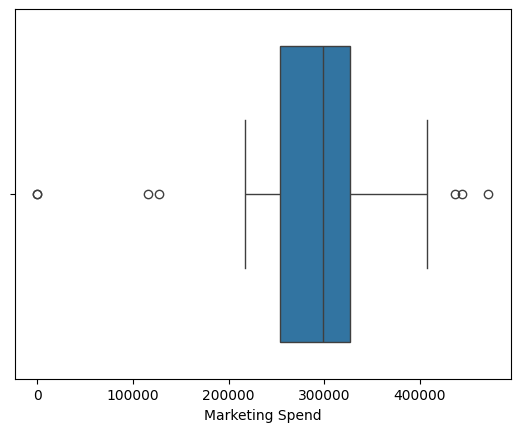

In [350]:
sns.boxplot(x = "Marketing Spend",data=dataset)
plt.show()

In [354]:
min_r = dataset["Marketing Spend"].mean() - (3* dataset["Marketing Spend"].std())
max_r = dataset["Marketing Spend"].mean() + (3* dataset["Marketing Spend"].std())
min_r,max_r

(np.float64(16647.281783753075), np.float64(563529.7695570632))

In [367]:
new1 = dataset[(dataset["Marketing Spend"] < max_r) & (dataset["Marketing Spend"] > min_r) ]
new2 = dataset[(dataset["Marketing Spend"] > max_r)]

In [ ]:
z_score = (dataset["Marketing Spend"] - dataset["Marketing Spend"].mean())/ dataset["Marketing Spend"].std() 

In [368]:
new2

,R&D Spend,Administration,Marketing Spend,State,Profit
